In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Formulas
$$k_l = \pm i \kappa_l = \sqrt{\left({\frac{lm}{a}}\right)^2 - \mu^2}$$

\begin{equation}
\begin{split}
    \hat{\psi}_+ (x,y) & = -\overline{\psi}\cos{\mu x} \\
                       & + \frac{2\alpha \psi_a}{\sinh{\kappa_1 a}} \sinh{\kappa_1 x} \cos\left( \frac{my}{a} \right) \\
                       & + \frac{2\alpha \psi_a \gamma_s \kappa_1}{\mu \sinh\left( \kappa_1 a \right) } \sin\left( \mu x \right) 
\end{split}
\end{equation}

In [7]:
# define parameters
a = 1
B_a = 1
mu0 = 1.4
mu = 1
alpha = 0.05

psi_bar = 1
psi_a = B_a / mu0 * np.tan(mu0 * a)
gamma_s = 400 * 0.05

kappa_1 = np.sqrt((1 * 2) ** 2 - mu ** 2)

X = np.linspace(0, 1.2*a, 100)
Y = np.linspace(-1*a, 1*a, 100)
X, Y = np.meshgrid(X, Y)

flux = -psi_bar * np.cos(mu * X)
flux += 2 * alpha * psi_a / np.sinh(kappa_1 * a) * np.sinh(kappa_1 * X) * np.cos(mu * Y)
flux += 2 * alpha * psi_a * gamma_s * kappa_1 / (mu * np.sinh(kappa_1 * a)) * np.sin(mu * X)
# flux = np.abs(flux)


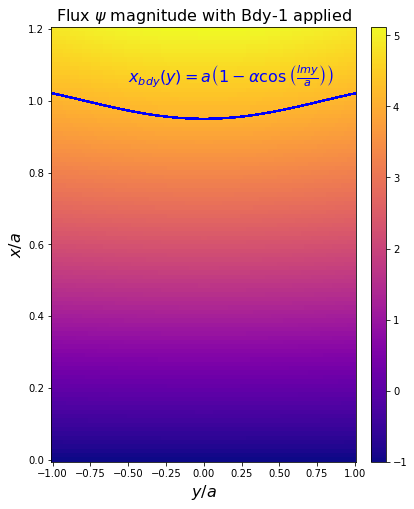

In [8]:
fig, ax = plt.subplots(figsize=(6,8))

im = ax.pcolormesh(Y, X, flux, cmap=cm.plasma)
ax.plot(Y, a*(1-alpha*np.cos(1 * 2 * Y / a)),'-b')
ax.text(-0.5,1.05,'$x_{bdy}(y)=a\\left(1-α \\cos\\left(\\frac{lmy}{a}\\right)\\right)$', color='b',fontsize=16)
ax.set_title('Flux $\psi$ magnitude with Bdy-1 applied',fontsize=16)
ax.set_ylabel('$x/a$',fontsize=16);
ax.set_xlabel('$y/a$',fontsize=16);


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

fig.colorbar(im, cax=cax);

fig.savefig('bdy-1_general-solution.png', transparent=False);